In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
torch.random.seed = 42

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
n_epochs = 5
log_interval = 10

In [3]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()]))

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size_train, True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size_test, True)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)


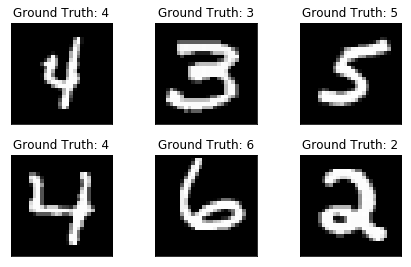

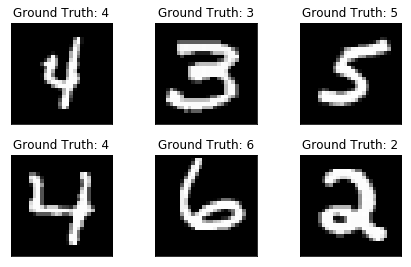

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

In [8]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [9]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [10]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [11]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [12]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/usr/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3033, Accuracy: 1041/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.286074
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.038069
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.545043
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.319062
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.201855
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.132497
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.220403
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.278682
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.170327
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.173962
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.142154
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.117722
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.115161
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.123068
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.217128
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.203925
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.080338
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.108209
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.072615
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.046390
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.033371
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.024716
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.070409
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.094442
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.002452
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.037062
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.036139
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.031577
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.120623
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.068109
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.060204
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.012198
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.026507
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.072536
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.022359
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.013697
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.057093
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.012354
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.006883


Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.002648
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.072073
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.136809
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.026826
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.042954
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.040488
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.002732
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.010490
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.000751
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.024795
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.012519
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.086925
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.009813
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.073332
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.016020
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.128756
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.010907
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.010796
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.032350
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.174216


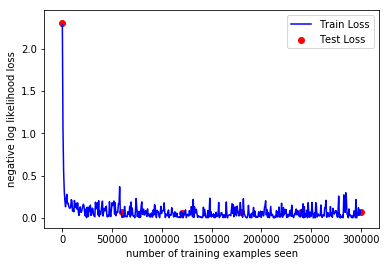

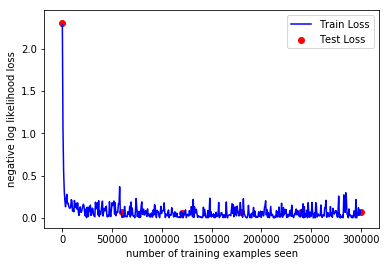

In [13]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.

NameError: name 'output' is not defined

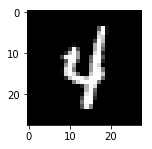

In [14]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig